# What is a MLP?

MLP or Multilayer Percpeptron is a classifier which consists of multiple layers of nodes. Each layer is fully connected to the next layer within the network. These links between nodes have data associated with them called weights. These weights are denoted by an integer number that controls the signal from node to node.

The beauty behind a MLP is the network's ability to alter the weight according to the previous learning outcome. This is continually adjusted when the network generates an undersirable output in order to achieve a desirable output. 

Below we will go through a simple example demonstrating the MLP classifier on the MNIST dataset. 

We've referenced the following notebook to help construct this example: https://github.com/rcassani/mlp-example/blob/master/mlp_notebook.ipynb

In [1]:
#our imports
from sklearn.neural_network import MLPClassifier
import numpy as np
import pickle, gzip
import matplotlib.pyplot as plt
from mnist import MNIST
from PIL import Image, ImageDraw
import wget

In [ ]:
#download our MNIST dataset
url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
filename = wget.download(url)

In [2]:
#load our dataset
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

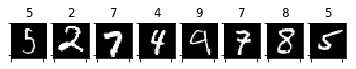

In [3]:
#plot some examples
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(train_set[0][examples[ix_example],:], [28,28])
    ax = plt.subplot(1,n_examples, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(train_set[1][examples[ix_example]]))
    plt.imshow(tmp, cmap='gray')

In [4]:
#preparing our train/test splits
# Training data
train_X = valid_set[0]
train_y = valid_set[1]  
print('Shape of training set: ' + str(train_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(train_y)
labels = np.unique(train_y)
train_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(train_y == labels[ix_label])[0]
    train_Y[ix_tmp, ix_label] = 1


# Test data
test_X = test_set[0]
test_y = test_set[1] 
print('Shape of test set: ' + str(test_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(test_y)
labels = np.unique(test_y)
test_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(test_y == labels[ix_label])[0]
    test_Y[ix_tmp, ix_label] = 1

Shape of training set: (10000, 784)
Shape of test set: (10000, 784)


In [11]:
#our MLP object with some properties
mlp = MLPClassifier(verbose='True',
                    early_stopping=True)
print(mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose='True', warm_start=False)


In [12]:
#training our MLP
iterations = 100
loss = np.zeros([iterations,1])

for ix in range(iterations):
    mlp.fit(train_X, train_Y)
    Y_hat = mlp.predict(train_X)
    y_tmp = np.argmax(Y_hat, axis=1)
    y_hat = labels[y_tmp]
    
    loss[ix] = (0.5)*np.square(y_hat - train_y).mean()



Iteration 1, loss = 2.93377082
Validation score: 0.498000
Iteration 2, loss = 1.27316322
Validation score: 0.686000
Iteration 3, loss = 0.93308758
Validation score: 0.745000
Iteration 4, loss = 0.77806976
Validation score: 0.783000
Iteration 5, loss = 0.68203088
Validation score: 0.795000
Iteration 6, loss = 0.61730788
Validation score: 0.825000
Iteration 7, loss = 0.55861652
Validation score: 0.836000
Iteration 8, loss = 0.51350955
Validation score: 0.846000
Iteration 9, loss = 0.47614871
Validation score: 0.859000
Iteration 10, loss = 0.44059663
Validation score: 0.867000
Iteration 11, loss = 0.41169931
Validation score: 0.869000
Iteration 12, loss = 0.38471063
Validation score: 0.877000
Iteration 13, loss = 0.36182011
Validation score: 0.881000
Iteration 14, loss = 0.34149885
Validation score: 0.887000
Iteration 15, loss = 0.32259971
Validation score: 0.891000
Iteration 16, loss = 0.30463204
Validation score: 0.894000
Iteration 17, loss = 0.28903471
Validation score: 0.892000
Iterat

Iteration 17, loss = 0.31593364
Validation score: 0.898000
Iteration 18, loss = 0.30098452
Validation score: 0.901000
Iteration 19, loss = 0.28733871
Validation score: 0.908000
Iteration 20, loss = 0.27242365
Validation score: 0.906000
Iteration 21, loss = 0.26074049
Validation score: 0.912000
Iteration 22, loss = 0.24798421
Validation score: 0.910000
Iteration 23, loss = 0.23800018
Validation score: 0.911000
Iteration 24, loss = 0.22682391
Validation score: 0.909000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.81676530
Validation score: 0.506000
Iteration 2, loss = 1.22605991
Validation score: 0.733000
Iteration 3, loss = 0.91273369
Validation score: 0.790000
Iteration 4, loss = 0.76849126
Validation score: 0.812000
Iteration 5, loss = 0.67751976
Validation score: 0.844000
Iteration 6, loss = 0.60964264
Validation score: 0.849000
Iteration 7, loss = 0.55938024
Validation score: 0.857000
Iteration 8, loss = 0.516009

Iteration 27, loss = 0.19353789
Validation score: 0.906000
Iteration 28, loss = 0.18365133
Validation score: 0.901000
Iteration 29, loss = 0.17505360
Validation score: 0.910000
Iteration 30, loss = 0.16786160
Validation score: 0.904000
Iteration 31, loss = 0.16023036
Validation score: 0.908000
Iteration 32, loss = 0.15410336
Validation score: 0.913000
Iteration 33, loss = 0.14577425
Validation score: 0.912000
Iteration 34, loss = 0.14026018
Validation score: 0.917000
Iteration 35, loss = 0.13374666
Validation score: 0.914000
Iteration 36, loss = 0.12858220
Validation score: 0.914000
Iteration 37, loss = 0.12324065
Validation score: 0.916000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.00919689
Validation score: 0.459000
Iteration 2, loss = 1.34182223
Validation score: 0.701000
Iteration 3, loss = 0.98504344
Validation score: 0.771000
Iteration 4, loss = 0.82275100
Validation score: 0.804000
Iteration 5, loss = 0.725

Iteration 6, loss = 0.64386679
Validation score: 0.835000
Iteration 7, loss = 0.58952757
Validation score: 0.841000
Iteration 8, loss = 0.54323961
Validation score: 0.854000
Iteration 9, loss = 0.50286907
Validation score: 0.863000
Iteration 10, loss = 0.46884715
Validation score: 0.873000
Iteration 11, loss = 0.43906456
Validation score: 0.875000
Iteration 12, loss = 0.41106867
Validation score: 0.880000
Iteration 13, loss = 0.38656232
Validation score: 0.889000
Iteration 14, loss = 0.36428367
Validation score: 0.891000
Iteration 15, loss = 0.34385541
Validation score: 0.900000
Iteration 16, loss = 0.32514531
Validation score: 0.898000
Iteration 17, loss = 0.30845443
Validation score: 0.910000
Iteration 18, loss = 0.29229658
Validation score: 0.907000
Iteration 19, loss = 0.27819624
Validation score: 0.910000
Iteration 20, loss = 0.26279744
Validation score: 0.907000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.027

Iteration 14, loss = 0.37406246
Validation score: 0.872000
Iteration 15, loss = 0.35404001
Validation score: 0.882000
Iteration 16, loss = 0.33387788
Validation score: 0.884000
Iteration 17, loss = 0.31761738
Validation score: 0.882000
Iteration 18, loss = 0.30119888
Validation score: 0.886000
Iteration 19, loss = 0.28731101
Validation score: 0.883000
Iteration 20, loss = 0.27186751
Validation score: 0.888000
Iteration 21, loss = 0.25940536
Validation score: 0.889000
Iteration 22, loss = 0.24838869
Validation score: 0.892000
Iteration 23, loss = 0.23743148
Validation score: 0.890000
Iteration 24, loss = 0.22635959
Validation score: 0.891000
Iteration 25, loss = 0.21695324
Validation score: 0.895000
Iteration 26, loss = 0.20648771
Validation score: 0.897000
Iteration 27, loss = 0.19840151
Validation score: 0.896000
Iteration 28, loss = 0.18958550
Validation score: 0.900000
Iteration 29, loss = 0.18134838
Validation score: 0.898000
Iteration 30, loss = 0.17377135
Validation score: 0.8990

Iteration 3, loss = 0.99278847
Validation score: 0.771000
Iteration 4, loss = 0.82297806
Validation score: 0.799000
Iteration 5, loss = 0.72042121
Validation score: 0.828000
Iteration 6, loss = 0.65023288
Validation score: 0.839000
Iteration 7, loss = 0.59412867
Validation score: 0.849000
Iteration 8, loss = 0.54828428
Validation score: 0.855000
Iteration 9, loss = 0.51032228
Validation score: 0.862000
Iteration 10, loss = 0.47602793
Validation score: 0.864000
Iteration 11, loss = 0.44528408
Validation score: 0.876000
Iteration 12, loss = 0.41789123
Validation score: 0.873000
Iteration 13, loss = 0.39516579
Validation score: 0.886000
Iteration 14, loss = 0.37386410
Validation score: 0.890000
Iteration 15, loss = 0.35534006
Validation score: 0.894000
Iteration 16, loss = 0.33825648
Validation score: 0.893000
Iteration 17, loss = 0.32109342
Validation score: 0.892000
Iteration 18, loss = 0.30655505
Validation score: 0.897000
Iteration 19, loss = 0.29277350
Validation score: 0.896000
Iter

Iteration 19, loss = 0.26361452
Validation score: 0.902000
Iteration 20, loss = 0.25113051
Validation score: 0.901000
Iteration 21, loss = 0.23801677
Validation score: 0.903000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.08508954
Validation score: 0.473000
Iteration 2, loss = 1.35332180
Validation score: 0.720000
Iteration 3, loss = 0.98443878
Validation score: 0.771000
Iteration 4, loss = 0.81880926
Validation score: 0.809000
Iteration 5, loss = 0.71379326
Validation score: 0.831000
Iteration 6, loss = 0.63964026
Validation score: 0.848000
Iteration 7, loss = 0.58222244
Validation score: 0.862000
Iteration 8, loss = 0.53534318
Validation score: 0.868000
Iteration 9, loss = 0.49544544
Validation score: 0.880000
Iteration 10, loss = 0.46505688
Validation score: 0.882000
Iteration 11, loss = 0.43573633
Validation score: 0.893000
Iteration 12, loss = 0.41100319
Validation score: 0.895000
Iteration 13, loss = 0.3882606

Iteration 11, loss = 0.40675380
Validation score: 0.874000
Iteration 12, loss = 0.38089572
Validation score: 0.874000
Iteration 13, loss = 0.35858878
Validation score: 0.871000
Iteration 14, loss = 0.33722914
Validation score: 0.878000
Iteration 15, loss = 0.31897299
Validation score: 0.881000
Iteration 16, loss = 0.30271294
Validation score: 0.886000
Iteration 17, loss = 0.28736999
Validation score: 0.886000
Iteration 18, loss = 0.27152250
Validation score: 0.887000
Iteration 19, loss = 0.25792257
Validation score: 0.886000
Iteration 20, loss = 0.24446657
Validation score: 0.888000
Iteration 21, loss = 0.23226994
Validation score: 0.891000
Iteration 22, loss = 0.21968544
Validation score: 0.893000
Iteration 23, loss = 0.20741680
Validation score: 0.891000
Iteration 24, loss = 0.19892935
Validation score: 0.893000
Iteration 25, loss = 0.18741543
Validation score: 0.894000
Iteration 26, loss = 0.17976866
Validation score: 0.898000
Iteration 27, loss = 0.17027769
Validation score: 0.8960

Iteration 3, loss = 0.92518493
Validation score: 0.763000
Iteration 4, loss = 0.77110232
Validation score: 0.809000
Iteration 5, loss = 0.67836357
Validation score: 0.809000
Iteration 6, loss = 0.61002248
Validation score: 0.836000
Iteration 7, loss = 0.55973535
Validation score: 0.837000
Iteration 8, loss = 0.51716713
Validation score: 0.854000
Iteration 9, loss = 0.48192066
Validation score: 0.856000
Iteration 10, loss = 0.45070586
Validation score: 0.861000
Iteration 11, loss = 0.42336772
Validation score: 0.869000
Iteration 12, loss = 0.40071067
Validation score: 0.867000
Iteration 13, loss = 0.37793060
Validation score: 0.874000
Iteration 14, loss = 0.35741577
Validation score: 0.881000
Iteration 15, loss = 0.33662750
Validation score: 0.889000
Iteration 16, loss = 0.31995348
Validation score: 0.882000
Iteration 17, loss = 0.30366698
Validation score: 0.891000
Iteration 18, loss = 0.28670701
Validation score: 0.895000
Iteration 19, loss = 0.27215675
Validation score: 0.894000
Iter

Iteration 18, loss = 0.30716402
Validation score: 0.896000
Iteration 19, loss = 0.29254422
Validation score: 0.902000
Iteration 20, loss = 0.28021002
Validation score: 0.900000
Iteration 21, loss = 0.26652631
Validation score: 0.905000
Iteration 22, loss = 0.25365756
Validation score: 0.909000
Iteration 23, loss = 0.24313240
Validation score: 0.907000
Iteration 24, loss = 0.23305307
Validation score: 0.907000
Iteration 25, loss = 0.22320266
Validation score: 0.908000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.18028454
Validation score: 0.398000
Iteration 2, loss = 1.40691408
Validation score: 0.671000
Iteration 3, loss = 0.99922750
Validation score: 0.762000
Iteration 4, loss = 0.81769520
Validation score: 0.785000
Iteration 5, loss = 0.70976023
Validation score: 0.810000
Iteration 6, loss = 0.63733615
Validation score: 0.829000
Iteration 7, loss = 0.57664862
Validation score: 0.845000
Iteration 8, loss = 0.532092

Iteration 1, loss = 3.22793332
Validation score: 0.393000
Iteration 2, loss = 1.46700503
Validation score: 0.660000
Iteration 3, loss = 1.05857158
Validation score: 0.753000
Iteration 4, loss = 0.86577691
Validation score: 0.788000
Iteration 5, loss = 0.75527081
Validation score: 0.814000
Iteration 6, loss = 0.67743510
Validation score: 0.830000
Iteration 7, loss = 0.62180938
Validation score: 0.839000
Iteration 8, loss = 0.57813221
Validation score: 0.850000
Iteration 9, loss = 0.53943702
Validation score: 0.852000
Iteration 10, loss = 0.50888698
Validation score: 0.865000
Iteration 11, loss = 0.48088257
Validation score: 0.872000
Iteration 12, loss = 0.45687527
Validation score: 0.877000
Iteration 13, loss = 0.43527222
Validation score: 0.874000
Iteration 14, loss = 0.41433990
Validation score: 0.885000
Iteration 15, loss = 0.39910696
Validation score: 0.884000
Iteration 16, loss = 0.37780071
Validation score: 0.892000
Iteration 17, loss = 0.36178117
Validation score: 0.885000
Iterat

Iteration 18, loss = 0.29156188
Validation score: 0.887000
Iteration 19, loss = 0.27723340
Validation score: 0.895000
Iteration 20, loss = 0.26185461
Validation score: 0.892000
Iteration 21, loss = 0.24985944
Validation score: 0.893000
Iteration 22, loss = 0.23794554
Validation score: 0.896000
Iteration 23, loss = 0.22897776
Validation score: 0.902000
Iteration 24, loss = 0.21796676
Validation score: 0.901000
Iteration 25, loss = 0.20517401
Validation score: 0.901000
Iteration 26, loss = 0.19591452
Validation score: 0.901000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.93510398
Validation score: 0.480000
Iteration 2, loss = 1.31125007
Validation score: 0.715000
Iteration 3, loss = 0.94485577
Validation score: 0.769000
Iteration 4, loss = 0.79008748
Validation score: 0.803000
Iteration 5, loss = 0.69566376
Validation score: 0.834000
Iteration 6, loss = 0.62795247
Validation score: 0.855000
Iteration 7, loss = 0.57174

Iteration 3, loss = 0.92100166
Validation score: 0.788000
Iteration 4, loss = 0.77828169
Validation score: 0.831000
Iteration 5, loss = 0.69188230
Validation score: 0.847000
Iteration 6, loss = 0.62887844
Validation score: 0.858000
Iteration 7, loss = 0.58063618
Validation score: 0.868000
Iteration 8, loss = 0.54084579
Validation score: 0.873000
Iteration 9, loss = 0.50572692
Validation score: 0.882000
Iteration 10, loss = 0.47595559
Validation score: 0.886000
Iteration 11, loss = 0.44709803
Validation score: 0.893000
Iteration 12, loss = 0.42362272
Validation score: 0.895000
Iteration 13, loss = 0.40142942
Validation score: 0.901000
Iteration 14, loss = 0.38062693
Validation score: 0.907000
Iteration 15, loss = 0.36281760
Validation score: 0.907000
Iteration 16, loss = 0.34432714
Validation score: 0.909000
Iteration 17, loss = 0.32749100
Validation score: 0.915000
Iteration 18, loss = 0.31115194
Validation score: 0.913000
Iteration 19, loss = 0.29593745
Validation score: 0.912000
Iter

Iteration 27, loss = 0.18679267
Validation score: 0.914000
Iteration 28, loss = 0.17875741
Validation score: 0.919000
Iteration 29, loss = 0.17129890
Validation score: 0.917000
Iteration 30, loss = 0.16421768
Validation score: 0.919000
Iteration 31, loss = 0.15667544
Validation score: 0.920000
Iteration 32, loss = 0.15047966
Validation score: 0.916000
Iteration 33, loss = 0.14330821
Validation score: 0.920000
Iteration 34, loss = 0.13749244
Validation score: 0.916000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.78512223
Validation score: 0.535000
Iteration 2, loss = 1.22037838
Validation score: 0.726000
Iteration 3, loss = 0.90428185
Validation score: 0.760000
Iteration 4, loss = 0.75914190
Validation score: 0.797000
Iteration 5, loss = 0.66733070
Validation score: 0.814000
Iteration 6, loss = 0.60033625
Validation score: 0.821000
Iteration 7, loss = 0.54457703
Validation score: 0.839000
Iteration 8, loss = 0.500705

Iteration 18, loss = 0.27189171
Validation score: 0.901000
Iteration 19, loss = 0.25872321
Validation score: 0.900000
Iteration 20, loss = 0.24338256
Validation score: 0.900000
Iteration 21, loss = 0.23259927
Validation score: 0.903000
Iteration 22, loss = 0.21904503
Validation score: 0.903000
Iteration 23, loss = 0.21062751
Validation score: 0.901000
Iteration 24, loss = 0.20053549
Validation score: 0.903000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.11187084
Validation score: 0.425000
Iteration 2, loss = 1.40631506
Validation score: 0.654000
Iteration 3, loss = 1.01480331
Validation score: 0.740000
Iteration 4, loss = 0.83436347
Validation score: 0.774000
Iteration 5, loss = 0.72867065
Validation score: 0.798000
Iteration 6, loss = 0.65336593
Validation score: 0.823000
Iteration 7, loss = 0.59698434
Validation score: 0.830000
Iteration 8, loss = 0.55301207
Validation score: 0.841000
Iteration 9, loss = 0.5140329

Iteration 13, loss = 0.36933813
Validation score: 0.892000
Iteration 14, loss = 0.34835135
Validation score: 0.896000
Iteration 15, loss = 0.32897587
Validation score: 0.900000
Iteration 16, loss = 0.30975084
Validation score: 0.895000
Iteration 17, loss = 0.29282536
Validation score: 0.895000
Iteration 18, loss = 0.27942261
Validation score: 0.902000
Iteration 19, loss = 0.26409427
Validation score: 0.900000
Iteration 20, loss = 0.25166439
Validation score: 0.903000
Iteration 21, loss = 0.23871960
Validation score: 0.907000
Iteration 22, loss = 0.22544142
Validation score: 0.907000
Iteration 23, loss = 0.21490506
Validation score: 0.906000
Iteration 24, loss = 0.20450209
Validation score: 0.904000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.97600096
Validation score: 0.459000
Iteration 2, loss = 1.35551503
Validation score: 0.706000
Iteration 3, loss = 0.97419057
Validation score: 0.755000
Iteration 4, loss = 0.80

Iteration 8, loss = 0.52695588
Validation score: 0.847000
Iteration 9, loss = 0.48941246
Validation score: 0.863000
Iteration 10, loss = 0.45385472
Validation score: 0.871000
Iteration 11, loss = 0.42258965
Validation score: 0.873000
Iteration 12, loss = 0.39688454
Validation score: 0.879000
Iteration 13, loss = 0.37223190
Validation score: 0.885000
Iteration 14, loss = 0.34975116
Validation score: 0.889000
Iteration 15, loss = 0.32913564
Validation score: 0.890000
Iteration 16, loss = 0.31249787
Validation score: 0.893000
Iteration 17, loss = 0.29607970
Validation score: 0.896000
Iteration 18, loss = 0.28293516
Validation score: 0.895000
Iteration 19, loss = 0.26743458
Validation score: 0.897000
Iteration 20, loss = 0.25498510
Validation score: 0.902000
Iteration 21, loss = 0.24078155
Validation score: 0.905000
Iteration 22, loss = 0.22889552
Validation score: 0.906000
Iteration 23, loss = 0.21980227
Validation score: 0.908000
Iteration 24, loss = 0.20844458
Validation score: 0.908000

Iteration 17, loss = 0.28841198
Validation score: 0.892000
Iteration 18, loss = 0.27717335
Validation score: 0.891000
Iteration 19, loss = 0.26236291
Validation score: 0.894000
Iteration 20, loss = 0.25012636
Validation score: 0.896000
Iteration 21, loss = 0.24105992
Validation score: 0.899000
Iteration 22, loss = 0.22788277
Validation score: 0.900000
Iteration 23, loss = 0.21764686
Validation score: 0.907000
Iteration 24, loss = 0.20862729
Validation score: 0.905000
Iteration 25, loss = 0.20001041
Validation score: 0.907000
Iteration 26, loss = 0.18913829
Validation score: 0.905000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.67459923
Validation score: 0.550000
Iteration 2, loss = 1.18395345
Validation score: 0.737000
Iteration 3, loss = 0.88503658
Validation score: 0.790000
Iteration 4, loss = 0.74714796
Validation score: 0.821000
Iteration 5, loss = 0.65935941
Validation score: 0.835000
Iteration 6, loss = 0.5929

Iteration 32, loss = 0.14438210
Validation score: 0.915000
Iteration 33, loss = 0.13982876
Validation score: 0.916000
Iteration 34, loss = 0.13278272
Validation score: 0.913000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.76349297
Validation score: 0.472000
Iteration 2, loss = 1.27564257
Validation score: 0.698000
Iteration 3, loss = 0.94137086
Validation score: 0.768000
Iteration 4, loss = 0.79020774
Validation score: 0.810000
Iteration 5, loss = 0.70055085
Validation score: 0.825000
Iteration 6, loss = 0.63494294
Validation score: 0.835000
Iteration 7, loss = 0.58730882
Validation score: 0.847000
Iteration 8, loss = 0.54180252
Validation score: 0.857000
Iteration 9, loss = 0.50483231
Validation score: 0.858000
Iteration 10, loss = 0.47202743
Validation score: 0.868000
Iteration 11, loss = 0.44297124
Validation score: 0.874000
Iteration 12, loss = 0.41429635
Validation score: 0.884000
Iteration 13, loss = 0.3898281

Iteration 16, loss = 0.30558211
Validation score: 0.902000
Iteration 17, loss = 0.28932856
Validation score: 0.905000
Iteration 18, loss = 0.27393289
Validation score: 0.907000
Iteration 19, loss = 0.26056521
Validation score: 0.906000
Iteration 20, loss = 0.24826348
Validation score: 0.912000
Iteration 21, loss = 0.23400867
Validation score: 0.913000
Iteration 22, loss = 0.22319807
Validation score: 0.912000
Iteration 23, loss = 0.21299881
Validation score: 0.912000
Iteration 24, loss = 0.20293656
Validation score: 0.911000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.04280359
Validation score: 0.486000
Iteration 2, loss = 1.33998170
Validation score: 0.699000
Iteration 3, loss = 0.95924049
Validation score: 0.761000
Iteration 4, loss = 0.79363456
Validation score: 0.789000
Iteration 5, loss = 0.69794679
Validation score: 0.813000
Iteration 6, loss = 0.62864598
Validation score: 0.823000
Iteration 7, loss = 0.57514

Iteration 26, loss = 0.19850062
Validation score: 0.909000
Iteration 27, loss = 0.18924489
Validation score: 0.911000
Iteration 28, loss = 0.18124782
Validation score: 0.910000
Iteration 29, loss = 0.17438160
Validation score: 0.906000
Iteration 30, loss = 0.16558703
Validation score: 0.913000
Iteration 31, loss = 0.15869340
Validation score: 0.910000
Iteration 32, loss = 0.15202736
Validation score: 0.914000
Iteration 33, loss = 0.14615043
Validation score: 0.914000
Iteration 34, loss = 0.13894906
Validation score: 0.914000
Iteration 35, loss = 0.13318707
Validation score: 0.914000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.95323560
Validation score: 0.506000
Iteration 2, loss = 1.23780911
Validation score: 0.699000
Iteration 3, loss = 0.90750191
Validation score: 0.759000
Iteration 4, loss = 0.76703529
Validation score: 0.780000
Iteration 5, loss = 0.68188669
Validation score: 0.812000
Iteration 6, loss = 0.6195

Iteration 13, loss = 0.42535236
Validation score: 0.894000
Iteration 14, loss = 0.40292953
Validation score: 0.890000
Iteration 15, loss = 0.38415323
Validation score: 0.899000
Iteration 16, loss = 0.36303229
Validation score: 0.899000
Iteration 17, loss = 0.34619913
Validation score: 0.900000
Iteration 18, loss = 0.32991067
Validation score: 0.909000
Iteration 19, loss = 0.31464148
Validation score: 0.905000
Iteration 20, loss = 0.30119870
Validation score: 0.905000
Iteration 21, loss = 0.28796210
Validation score: 0.913000
Iteration 22, loss = 0.27417866
Validation score: 0.913000
Iteration 23, loss = 0.26132186
Validation score: 0.913000
Iteration 24, loss = 0.24942899
Validation score: 0.911000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.91782665
Validation score: 0.439000
Iteration 2, loss = 1.36372450
Validation score: 0.698000
Iteration 3, loss = 0.99445387
Validation score: 0.777000
Iteration 4, loss = 0.83

Training Accuracy: 95.39999999999999


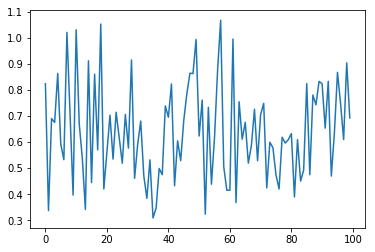

In [13]:
# Ploting loss vs iterations
plt.figure()
ix = np.arange(iterations)
plt.plot(ix, loss)

# Training Accuracy
Y_hat = mlp.predict(train_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == train_y))
print('Training Accuracy: ' + str(acc*100))

In [14]:
#testing our MLP
Y_hat = mlp.predict(test_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == test_y))
print('Testing Accuracy: ' + str(acc*100))

Testing Accuracy: 90.47
